# Read data from densification test

## Imports

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

## Códigos

In [3]:
def read_info(info_path):
    with open(info_path) as file:
        info = json.load(file)
    return info
    
def write_info(info_path, info):
    json_object = json.dumps(info, indent = 2)
    with open(info_path, 'w') as file:
        file.write(json_object)
        file.close()

def get_data(folder, exp_setting, res_dict, check):
    res_dict[exp_setting] = {}
    info = read_info(os.path.join(folder, 'metrics.json'))

    res_dict[exp_setting]['Tempo'] = round(info['tempo_train'], 5)
    keys_in = ['num_gaussians', 'PSNR', 'SSIM', 'LPIPS', 'FPS']
    keys_out = ['Number Gaussians', 'PSNR', 'SSIM', 'LPIPS', 'FPS']
    for key_in, key_out in zip(keys_in, keys_out):
        res_dict[exp_setting][key_out] = round(info[str(check)][key_in], 5)
    return res_dict

def get_df(json_folder, es=True, title='', check='10000'):
    res_dict = {}
    
    for folder in sorted(os.listdir(json_folder), key=lambda a: int(a.split()[3].removeprefix('refine-every_')), reverse=False):
        if folder.split()[1].endswith(str(es)):
            res_dict = get_data(os.path.join(json_folder, folder), folder, res_dict, check)

    df = pd.DataFrame(res_dict).T
    if len(res_dict.keys()) > 0:
        plot_up(df.index.tolist(), df, "PSNR", "Number Gaussians", title)
        plot_down(df.index.tolist(), df, "SSIM", "LPIPS", title)
    
    return df

def plot_up(xs, df, key1, key2, title):
    var1 = df[key1]
    var2 = df[key2]

    xs=[*map(lambda t:t.split()[2].replace('reset-alpha-every', 'rae') + ' ' + t.split()[3].replace('refine-every', 're'), xs)]
    
    x = np.arange(len(xs))      # numeric x locations
    width = 0.4                     # width of the bars

    fig, ax1 = plt.subplots(figsize=(10, 2))
    
    # First axis (left y-axis)
    bars1 = ax1.bar(x - width/2, var1, width, color="tab:blue", label="Variable 1")
    ax1.set_ylabel(key1, color="tab:blue")
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%02.2f'))
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    ma = max(var1)
    mi = min(var1)
    ax1.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)
    
    # Second axis (right y-axis)
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, var2, width, color="tab:orange", label="Variable 2")
    ax2.set_ylabel(key2, color="tab:orange")
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%06.1f'))
    ax2.tick_params(axis="y", labelcolor="tab:orange")
    ma = max(var2)
    mi = min(var2)
    ax2.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)
    
    # X-axis settings
    # ax1.set_xticks(x)
    # ax1.set_xticklabels(xs, rotation=90)
    # ax1.set_xlabel("Categories")
    ax1.set_xticks([])
    
    plt.grid(True)
    plt.title(title)
    plt.show()

def plot_down(xs, df, key1, key2, title):
    var1 = df[key1]
    var2 = df[key2]

    xs=[*map(lambda t:t.split()[2].replace('reset-alpha-every', 'rae') + ' ' + t.split()[3].replace('refine-every', 're'), xs)]
    
    x = np.arange(len(xs))      # numeric x locations
    width = 0.4                     # width of the bars

    fig, ax1 = plt.subplots(figsize=(10, 2))
    
    # First axis (left y-axis)
    bars1 = ax1.bar(x - width/2, var1, width, color="tab:green", label="Variable 1")
    ax1.set_ylabel(key1, color="tab:green")
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    ax1.tick_params(axis="y", labelcolor="tab:green")
    ma = max(var1)
    mi = min(var1)
    ax1.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)
    
    # Second axis (right y-axis)
    ax2 = ax1.twinx()
    bars2 = ax2.bar(x + width/2, var2, width, color="tab:red", label="Variable 2")
    ax2.set_ylabel(key2, color="tab:red")
    ax2.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    ax2.tick_params(axis="y", labelcolor="tab:red")
    ma = max(var2)
    mi = min(var2)
    ax2.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)
    
    # X-axis settings
    ax1.set_xticks(x)
    ax1.set_xticklabels(xs, rotation=90)
    ax1.set_xlabel("Testes")

    plt.grid(True)
    # plt.title(title)
    plt.show()

## Casa

In [4]:
dataset = 'casa'
check = '30000'

#### Splatfacto-big | Bilateral mudado and Scale ambos False

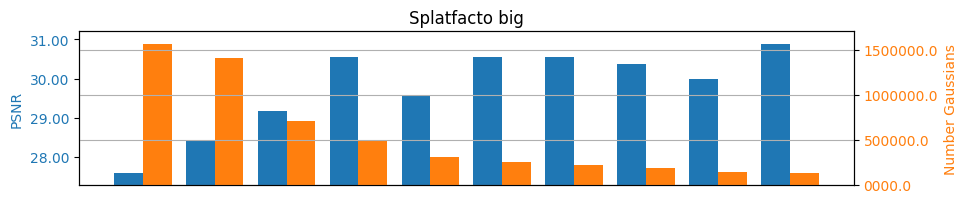

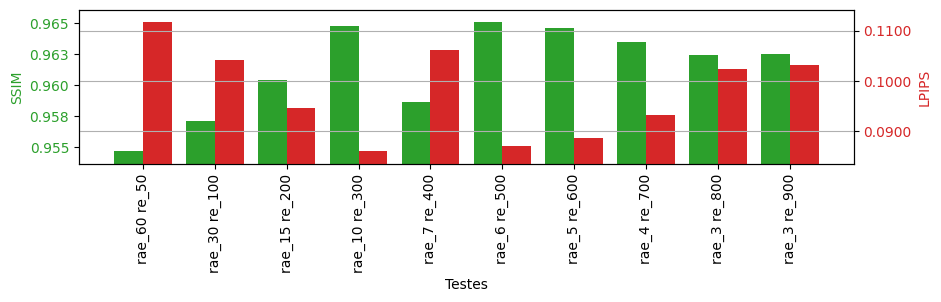

,Tempo,Number Gaussians,PSNR,SSIM,LPIPS,FPS
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_60 refine-every_50,13535.18809,1561885.0,27.60345,0.95471,0.11162,14.86091
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_30 refine-every_100,14225.48384,1408833.0,28.40637,0.95714,0.10413,11.75829
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_15 refine-every_200,5179.91947,705917.0,29.18175,0.96039,0.09454,42.20251
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_10 refine-every_300,2012.82140,493973.0,30.56273,0.96476,0.08609,46.38914
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_7 refine-every_400,1559.91208,302711.0,29.57794,0.95866,0.10608,49.74472
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_6 refine-every_500,1406.10376,245043.0,30.54952,0.96504,0.08710,52.76899
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_5 refine-every_600,1312.98997,212813.0,30.55778,0.96460,0.08863,52.72865
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_4 refine-every_700,1267.21638,178584.0,30.38472,0.96343,0.09314,52.72724
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_3 refine-every_800,1168.77113,138381.0,29.98457,0.96238,0.10242,56.23674
num-iterations_30k enhanced-splatfacto_False reset-alpha-every_3 refine-every_900,1122.12967,133514.0,30.87810,0.96251,0.10323,56.81459


In [5]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-big bilateral_False'

get_df(json_folder, es=False, title='Splatfacto big', check=check)

#### Splatfacto-big | Bilateral mudado and Scale ambos True

/tmp/ipykernel_71898/3769765417.py:55: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)
/tmp/ipykernel_71898/3769765417.py:65: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)


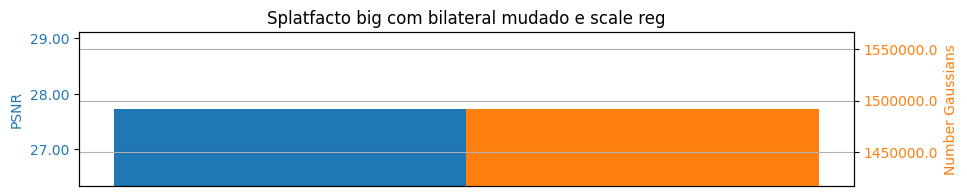

/tmp/ipykernel_71898/3769765417.py:95: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)
/tmp/ipykernel_71898/3769765417.py:105: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax2.set_ylim(mi - abs(ma - mi) * 0.1, ma + abs(ma - mi) * 0.1)


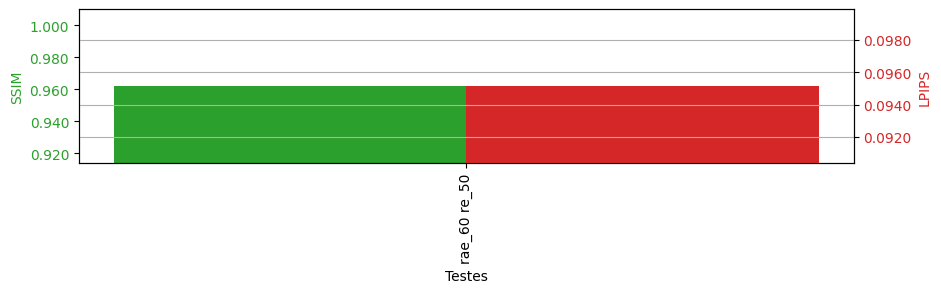

,Tempo,Number Gaussians,PSNR,SSIM,LPIPS,FPS
num-iterations_30k enhanced-splatfacto_True reset-alpha-every_60 refine-every_50,4373.73947,1491792.0,27.72556,0.96193,0.09514,35.32461


In [8]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-big bilateral_True'

get_df(json_folder, es=True, title='Splatfacto big com bilateral mudado e scale reg', check=check)

#### Splatfacto-mcmc | Bilateral mudado and Scale ambos False

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-mcmc bilateral_False'

get_df(json_folder, es=False, title='Splatfacto mcmc', check=check)

## Truck

In [ ]:
dataset = 'truck'
check = '30000'

#### Splatfacto-big | Bilateral mudado and Scale ambos False

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-big bilateral_False'

get_df(json_folder, es=False, title='Splatfacto big', check=check)

#### Splatfacto-big | Bilateral mudado and Scale ambos True

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-big bilateral_True'

get_df(json_folder, es=True, title='Splatfacto big com bilateral mudado e scale reg', check=check)

#### Splatfacto-mcmc | Bilateral mudado and Scale ambos False

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-mcmc bilateral_False'

get_df(json_folder, es=False, title='Splatfacto mcmc', check=check)

## Train

In [ ]:
dataset = 'train'
check = '30000'

#### Splatfacto-big | Bilateral mudado and Scale ambos False

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-big bilateral_False'

get_df(json_folder, es=False, title='Splatfacto big', check=check)

#### Splatfacto-big | Bilateral mudado and Scale ambos True

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-big bilateral_True'

get_df(json_folder, es=True, title='Splatfacto big com bilateral mudado e scale reg', check=check)

#### Splatfacto-mcmc | Bilateral mudado and Scale ambos False

In [ ]:
json_folder = f'/home/tafnes/Documentos/teste_densification/{dataset}_jsons/splatfacto-mcmc bilateral_False'

get_df(json_folder, es=False, title='Splatfacto mcmc', check=check)